# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
import pandas as pd
pass_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, sep=',',skipinitialspace=True, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50K'])

female = pass_data[pass_data['sex'] == 'Female']
male = pass_data[pass_data['sex'] == 'Male']
print('count of females is ', female['sex'].count())
print('count of males is ', male['sex'].count())

count of females is  10771
count of males is  21790


### Вопрос 2
Каков средний возраст мужчин?


In [4]:
male = pass_data[pass_data['sex'] == 'Male']
mean_male_age = male['age'].mean()
print('mean males age is ', mean_male_age)

mean males age is  39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [5]:
usa = pass_data[pass_data['native-country'] == 'United-States']
usa_count = usa['native-country'].count()
country_count = pass_data['native-country'].count()
share_usa = usa_count/country_count
print('share of usa citizens is ', share_usa)

share of usa citizens is  0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

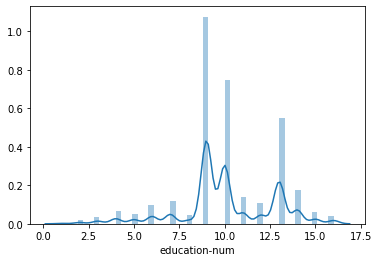

In [7]:
import seaborn as sns
sns_plot = sns.distplot(pass_data['education-num'])
fig = sns_plot.get_figure()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [8]:
divorced_people = pass_data[pass_data['marital-status'] == 'Divorced']
mean_weight_divorced = divorced_people['fnlwgt'].mean()
standart_deviation = divorced_people['fnlwgt'].std()
print('mean weight of divorced people is ', mean_weight_divorced)
print('standart deviation weight of divorced people is ', standart_deviation)

mean weight of divorced people is  185802.79045689848
standart deviation weight of divorced people is  105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [9]:
people_with_50k = pass_data[pass_data['50K'] == '>50K']
count_50k = people_with_50k['50K'].count()
higher_education_50k = people_with_50k[(people_with_50k['education'] == 'Bachelors')|(people_with_50k['education'] == 'Masters')|(people_with_50k['education'] == 'Some-college')|(people_with_50k['education'] == 'Assoc-acdm')|(people_with_50k['education'] == 'Doctorate')]
count_higher_50k = higher_education_50k['education'].count()
share_50k = count_higher_50k / count_50k
if share_50k > 0.5:
    print('it is true')
else:
    print('it is false')

it is true


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [10]:
white_female = female[female['race'] == 'White']
black_female = female[female['race'] == 'Black']
asian_female = female[female['race'] == 'Asian-Pac-Islander']
amer_female = female[female['race'] == 'Amer-Indian-Eskimo']
other_female = female[female['race'] == 'Other']
max_age_fwhite = white_female['age'].max()
max_age_fblack = black_female['age'].max()
max_age_fasian = asian_female['age'].max()
max_age_famer = amer_female['age'].max()
max_age_fother = other_female['age'].max()

white_male = male[male['race'] == 'White']
black_male = male[male['race'] == 'Black']
asian_male = male[male['race'] == 'Asian-Pac-Islander']
amer_male = male[male['race'] == 'Amer-Indian-Eskimo']
other_male = male[male['race'] == 'Other']
max_age_mwhite = white_male['age'].max()
max_age_mblack = black_male['age'].max()
max_age_masian = asian_male['age'].max()
max_age_mamer = amer_male['age'].max()
max_age_mother = other_male['age'].max()

print('max age of white women is ', max_age_fwhite)
print('max age of black women is ', max_age_fblack)
print('max age of asian women is ', max_age_fasian)
print('max age of amer women is ', max_age_famer)
print('max age of other women is ', max_age_fother)
print('max age of white men is ', max_age_mwhite)
print('max age of black men is ', max_age_mblack)
print('max age of asian men is ', max_age_masian)
print('max age of amer men is ', max_age_mamer)
print('max age of other men is ', max_age_mother)

max age of white women is  90
max age of black women is  90
max age of asian women is  75
max age of amer women is  80
max age of other women is  74
max age of white men is  90
max age of black men is  90
max age of asian men is  90
max age of amer men is  82
max age of other men is  77


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [11]:
farmers_fisher = pass_data[pass_data['occupation'] == 'Farming-fishing']
country_farmer = farmers_fisher.drop_duplicates('native-country')['native-country']
print('farmers and fishers are from ')
print(country_farmer)

farmers and fishers are from 
16       United-States
255           Cambodia
500             Poland
771          Guatemala
861             Mexico
2353           England
3532                 ?
6006       Philippines
6559             Italy
8551       Puerto-Rico
11271          Vietnam
12621          Germany
15177            Japan
16486           Canada
20549       Yugoslavia
21145             Cuba
22391         Portugal
25761      El-Salvador
25943             Hong
28654          Ireland
29466           France
Name: native-country, dtype: object


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [12]:
male_bachelors = male[male['education'] == 'Bachelors']
male_masters = male[male['education'] == 'Masters']
count_mbachelors = male_bachelors['education'].count()
count_mmasters = male_masters['education'].count()
mratio = count_mbachelors / count_mmasters

female_bachelors = female[female['education'] == 'Bachelors']
female_masters = female[female['education'] == 'Masters']
count_fbachelors = female_bachelors['education'].count()
count_fmasters = female_masters['education'].count()
fratio = count_fbachelors / count_fmasters

if mratio > fratio:
    print('the ratio of male bachelors to masters is more than female')
else:
    print('the ratio of female bachelors to masters is more than male')

the ratio of male bachelors to masters is more than female


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [16]:
max_hours = pass_data['hours-per-week'].max()
print('maximum working hours per week is ', max_hours)
max_workers = len(pass_data[pass_data['hours-per-week'] == max_hours])
print('count of people working maximum hours is ', max_workers)
salary = pass_data[pass_data['hours-per-week'] == max_hours].drop_duplicates('50K')['50K']
print('their salary is ')
print(salary)

maximum working hours per week is  99
count of people working maximum hours is  85
their salary is 
935      >50K
4086    <=50K
Name: 50K, dtype: object
